B TARUN KUMAR,
1CD24IS029,
Server response time prediction based on concurrent users and CPU load

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pandas (pd) → to load, clean, and manipulate data (DataFrames, CSV files)

numpy (np) → for numerical computations and efficient array operations

matplotlib.pyplot (plt) → for basic plotting and visualization

seaborn (sns) → for advanced and attractive statistical graphs

In [4]:
from google.colab import files

uploaded = files.upload()

Saving server_response.csv to server_response.csv


In [5]:
import pandas as pd

df = pd.read_csv('server_response.csv')



Information of the file

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   concurrent_users             939 non-null    float64
 1   cpu_utilization_percent      947 non-null    float64
 2   memory_utilization_percent   952 non-null    float64
 3   disk_io_operations           933 non-null    float64
 4   network_bandwidth_mbps       938 non-null    float64
 5   server_type                  938 non-null    object 
 6   virtualization               948 non-null    object 
 7   database_queries_per_second  955 non-null    float64
 8   cache_hit_rate               962 non-null    float64
 9   server_age_months            942 non-null    float64
 10  operating_system             954 non-null    object 
 11  application_complexity       948 non-null    object 
 12  peak_hour_flag               954 non-null    float64
 13  background_processe

Is there missing data in the file?

In [7]:
df.isnull().sum()

,0
concurrent_users,61
cpu_utilization_percent,53
memory_utilization_percent,48
disk_io_operations,67
network_bandwidth_mbps,62
server_type,62
virtualization,52
database_queries_per_second,45
cache_hit_rate,38
server_age_months,58


It counts how many times each unique value appears in the concurrent_users column of the DataFrame.

In [9]:
df['concurrent_users'].value_counts()

,count
concurrent_users,
2813.0,4
4952.0,3
3399.0,2
4377.0,2
1357.0,2
...,...
1181.0,1
4716.0,1
4319.0,1


It counts how many missing values (NaN) are present

In [10]:
df['concurrent_users'].isna().sum()

np.int64(61)

In [11]:
df['network_bandwidth_mbps'].isna().sum()

np.int64(62)

There are 62 missing values. We will replace with Mean

In [12]:
df['network_bandwidth_mbps'].fillna(df['network_bandwidth_mbps'].mean(),
                              inplace=True)

/tmp/ipython-input-2349548375.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['network_bandwidth_mbps'].fillna(df['network_bandwidth_mbps'].mean(),


In [13]:
df['network_bandwidth_mbps'].isna().sum()

np.int64(0)

In [14]:
df['cpu_utilization_percent'].isna().sum()

np.int64(53)

replacing the 53 values with median

In [15]:
df['cpu_utilization_percent'].fillna(df['cpu_utilization_percent'].median(),
                              inplace=True)

/tmp/ipython-input-214885790.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cpu_utilization_percent'].fillna(df['cpu_utilization_percent'].median(),


In [16]:
df['cpu_utilization_percent'].isna().sum()

np.int64(0)

In [17]:
df['memory_utilization_percent'].isna().sum()

np.int64(48)

In [18]:
df['memory_utilization_percent'].fillna(df['memory_utilization_percent'].median(),
                              inplace=True)

/tmp/ipython-input-896945359.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['memory_utilization_percent'].fillna(df['memory_utilization_percent'].median(),


In [19]:
df['memory_utilization_percent'].isna().sum()

np.int64(0)

In [20]:
df['database_queries_per_second'].isna().sum()

np.int64(45)

In [21]:
df['database_queries_per_second'].fillna(df['database_queries_per_second'].median(),
                              inplace=True)

/tmp/ipython-input-519975378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['database_queries_per_second'].fillna(df['database_queries_per_second'].median(),


In [22]:
df['cache_hit_rate'].isna().sum()

np.int64(38)

In [23]:
df['cache_hit_rate'].fillna(df['cache_hit_rate'].median(),
                              inplace=True)

/tmp/ipython-input-3502556362.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cache_hit_rate'].fillna(df['cache_hit_rate'].median(),


In [24]:
df['cache_hit_rate'].isna().sum()

np.int64(0)

In [25]:
df['server_age_months'].isna().sum()

np.int64(58)

In [26]:
df['server_age_months'].fillna(df['server_age_months'].median(),
                              inplace=True)

/tmp/ipython-input-3227170133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['server_age_months'].fillna(df['server_age_months'].median(),


In [27]:
df['server_age_months'].isna().sum()

np.int64(0)

In [28]:
df['peak_hour_flag'].isna().sum()

np.int64(46)

In [29]:
df['peak_hour_flag'].fillna(df['peak_hour_flag'].median(),
                              inplace=True)

/tmp/ipython-input-2603372464.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['peak_hour_flag'].fillna(df['peak_hour_flag'].median(),


In [30]:
df['peak_hour_flag'].isna().sum()

np.int64(0)

In [31]:
df['background_processes'].isna().sum()

np.int64(55)

In [32]:
df['background_processes'].fillna(df['background_processes'].mean(),
                              inplace=True)

/tmp/ipython-input-400282255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['background_processes'].fillna(df['background_processes'].mean(),


In [33]:
df['background_processes'].isna().sum()

np.int64(0)

In [34]:
df['response_time_ms'].isna().sum()

np.int64(42)

In [35]:
df['response_time_ms'].fillna(df['response_time_ms'].mean(),
                              inplace=True)

/tmp/ipython-input-1178797086.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['response_time_ms'].fillna(df['response_time_ms'].mean(),


In [36]:
df['response_time_ms'].isna().sum()

np.int64(0)

replace memory_utilization_percent missing data with knn

In [37]:
from sklearn.impute import KNNImputer

looks at the 2 nearest data points to fill missing values.

In [38]:
knn_imputer = KNNImputer(n_neighbors=2)

In [39]:
knn_imputed_column = knn_imputer.fit_transform(df[['memory_utilization_percent']])

df['memory_utilization_percent'] = knn_imputed_column

disk_io_operations Fill by forward fill

In [40]:
df['disk_io_operations'].isna().sum()

np.int64(67)

In [41]:
df['disk_io_operations'].fillna(method='ffill',
                                               inplace=True)

/tmp/ipython-input-1422089452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['disk_io_operations'].fillna(method='ffill',
/tmp/ipython-input-1422089452.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['disk_io_operations'].fillna(method='ffill',


In [42]:
df['disk_io_operations'].isna().sum()

np.int64(0)

In [43]:
df['concurrent_users'].isna().sum()

np.int64(61)

In [44]:
df['concurrent_users'].fillna(method='ffill',
                                               inplace=True)

/tmp/ipython-input-3389707573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['concurrent_users'].fillna(method='ffill',
/tmp/ipython-input-3389707573.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['concurrent_users'].fillna(method='ffill',


In [45]:
df['concurrent_users'].isna().sum()

np.int64(0)

In [46]:
df['server_type'].isna().sum()

np.int64(62)

In [47]:
df['server_type'].fillna(df['server_type']=='Not Available',
                  inplace=True)

/tmp/ipython-input-3641640069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['server_type'].fillna(df['server_type']=='Not Available',


In [48]:
df['server_type'].isna().sum()

np.int64(0)

In [49]:
df['virtualization'].isna().sum()

np.int64(52)

In [50]:
df['virtualization'].fillna(df['virtualization']=='Not Available',
                  inplace=True)

/tmp/ipython-input-4058682340.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['virtualization'].fillna(df['virtualization']=='Not Available',


In [51]:
df['virtualization'].isna().sum()

np.int64(0)

In [52]:
df['operating_system'].isna().sum()

np.int64(46)

In [53]:
df['operating_system'].fillna(df['operating_system']=='Not Available',
                  inplace=True)

/tmp/ipython-input-3433550363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['operating_system'].fillna(df['operating_system']=='Not Available',


In [54]:
df['operating_system'].isna().sum()

np.int64(0)

In [55]:
df['application_complexity'].isna().sum()

np.int64(52)

In [56]:
df['application_complexity'].fillna(df['application_complexity']=='Not Available',
                  inplace=True)

/tmp/ipython-input-496726792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['application_complexity'].fillna(df['application_complexity']=='Not Available',


In [57]:
df['application_complexity'].isna().sum()

np.int64(0)

In [58]:
df.isnull().sum()

,0
concurrent_users,0
cpu_utilization_percent,0
memory_utilization_percent,0
disk_io_operations,0
network_bandwidth_mbps,0
server_type,0
virtualization,0
database_queries_per_second,0
cache_hit_rate,0
server_age_months,0


It converts categorical (text) columns into numeric columns using

In [59]:
df = pd.get_dummies(df)

In [60]:
df

,concurrent_users,cpu_utilization_percent,memory_utilization_percent,disk_io_operations,network_bandwidth_mbps,database_queries_per_second,cache_hit_rate,server_age_months,peak_hour_flag,background_processes,...,virtualization_Physical,virtualization_VM,operating_system_False,operating_system_Linux,operating_system_Unix,operating_system_Windows,application_complexity_False,application_complexity_Complex,application_complexity_Moderate,application_complexity_Simple
0,971.0,57.629081,52.124425,940.607618,364.206563,18.890757,55.378511,14.961874,0.0,213.0,...,False,False,False,False,False,True,False,True,False,False
1,4715.0,83.929089,69.023883,5924.288052,670.814511,38.471198,76.723359,47.921654,0.0,231.0,...,True,False,False,True,False,False,False,True,False,False
2,4377.0,29.783440,77.417857,768.262538,515.302147,339.153358,84.147653,53.912896,0.0,256.0,...,True,False,False,False,False,True,False,False,True,False
3,4377.0,44.112779,73.102664,2518.672947,682.035603,225.610622,75.597512,19.551583,0.0,96.0,...,False,True,False,False,True,False,False,False,True,False
4,2365.0,63.162867,81.144871,6042.002851,126.877698,458.237281,79.319993,19.414097,1.0,492.0,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4300.0,49.331429,34.996817,5940.768593,296.871016,150.000723,53.989975,59.098192,0.0,251.0,...,False,False,False,False,True,False,False,False,True,False
996,3142.0,47.212190,44.266943,797.088809,54.427488,353.777188,78.657354,47.934914,0.0,214.0,...,False,False,False,False,True,False,False,False,False,True
997,4020.0,41.605416,70.473128,4551.734508,59.815965,160.239412,77.625594,17.558774,1.0,270.0,...,False,False,False,False,True,False,False,False,True,False
998,609.0,44.244713,63.724528,7384.037680,994.408877,336.288170,79.325820,52.573633,1.0,147.0,...,False,False,False,False,False,True,False,False,True,False


Build Regressiuon Model

In [61]:
X = df.drop('network_bandwidth_mbps', axis=1)

y = df['network_bandwidth_mbps']

In [62]:
X

,concurrent_users,cpu_utilization_percent,memory_utilization_percent,disk_io_operations,database_queries_per_second,cache_hit_rate,server_age_months,peak_hour_flag,background_processes,response_time_ms,...,virtualization_Physical,virtualization_VM,operating_system_False,operating_system_Linux,operating_system_Unix,operating_system_Windows,application_complexity_False,application_complexity_Complex,application_complexity_Moderate,application_complexity_Simple
0,971.0,57.629081,52.124425,940.607618,18.890757,55.378511,14.961874,0.0,213.0,494.885310,...,False,False,False,False,False,True,False,True,False,False
1,4715.0,83.929089,69.023883,5924.288052,38.471198,76.723359,47.921654,0.0,231.0,159.308163,...,True,False,False,True,False,False,False,True,False,False
2,4377.0,29.783440,77.417857,768.262538,339.153358,84.147653,53.912896,0.0,256.0,414.432085,...,True,False,False,False,False,True,False,False,True,False
3,4377.0,44.112779,73.102664,2518.672947,225.610622,75.597512,19.551583,0.0,96.0,213.765498,...,False,True,False,False,True,False,False,False,True,False
4,2365.0,63.162867,81.144871,6042.002851,458.237281,79.319993,19.414097,1.0,492.0,494.885310,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4300.0,49.331429,34.996817,5940.768593,150.000723,53.989975,59.098192,0.0,251.0,399.266334,...,False,False,False,False,True,False,False,False,True,False
996,3142.0,47.212190,44.266943,797.088809,353.777188,78.657354,47.934914,0.0,214.0,953.617391,...,False,False,False,False,True,False,False,False,False,True
997,4020.0,41.605416,70.473128,4551.734508,160.239412,77.625594,17.558774,1.0,270.0,184.907253,...,False,False,False,False,True,False,False,False,True,False
998,609.0,44.244713,63.724528,7384.037680,336.288170,79.325820,52.573633,1.0,147.0,21.040844,...,False,False,False,False,False,True,False,False,True,False


In [63]:
y

,network_bandwidth_mbps
0,364.206563
1,670.814511
2,515.302147
3,682.035603
4,126.877698
...,...
995,296.871016
996,54.427488
997,59.815965
998,994.408877


Split the data into Training and Test datasets

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42)

In [66]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()


In [67]:
regression_model.fit(X_train, y_train)

LinearRegression()

It uses the trained regression model to predict output values for the test data

In [68]:
regression_model.predict(X_test)

array([478.60952483, 444.66196433, 477.72950066, 599.11197848,
       507.40076423, 562.60672265, 521.64995411, 477.45591735,
       467.16747173, 481.88799171, 543.02242566, 482.52534345,
       515.80159012, 457.28052733, 464.52987806, 470.22874748,
       535.22508126, 553.73786444, 600.78705022, 424.16415618,
       519.20853828, 518.18263828, 463.8332507 , 556.51174798,
       573.26096511, 495.45632339, 490.71652726, 394.29325505,
       506.85168008, 457.41734518, 542.96109224, 550.78213171,
       599.09352092, 468.12109236, 524.07812155, 551.21817478,
       521.8931965 , 519.06447714, 515.44998514, 548.05618036,
       518.67166376, 586.49407241, 430.40782154, 490.63324635,
       479.79204161, 474.91743637, 592.66178898, 522.79296833,
       528.42956498, 603.18120351, 479.03712119, 442.54796018,
       438.73972553, 525.72211068, 549.40082487, 480.64904716,
       547.37680076, 437.28660641, 487.69383989, 593.39486853,
       408.83604103, 486.21332498, 541.08697052, 469.75

In [69]:
y_pred = regression_model.predict(X_test)

In [77]:
regression_model.intercept_

np.float64(433.85933881081496)

In [78]:
r2_score(y_test, y_pred)

-0.056835160324526734

In [79]:
mean_squared_error(y_test, y_pred)

78804.6552317852

In [80]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(RMSE)

280.7216686181977


regression evaluation plot.

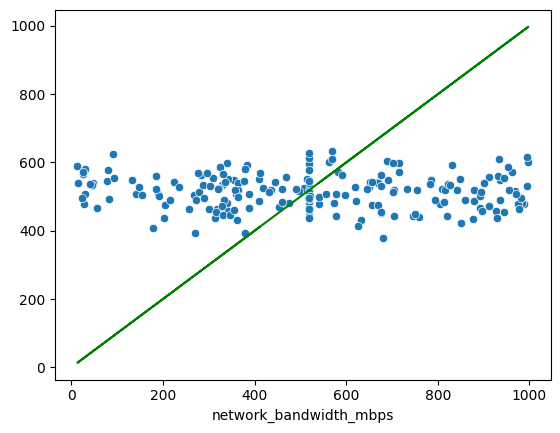

In [70]:
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(y_test, y_test, color='green')
plt.show()

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

It counts how many times each unique value appears in the concurrent_users column and plots it as a bar chart.

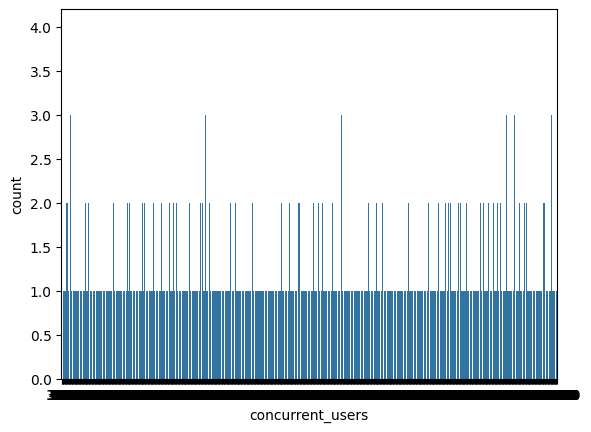

In [72]:
from typing import Annotated
sns.countplot(x='concurrent_users', data=df)
plt.show()

creates a scatter plot to study the relationship between CPU usage and memory usage.

<Axes: xlabel='cpu_utilization_percent', ylabel='memory_utilization_percent'>

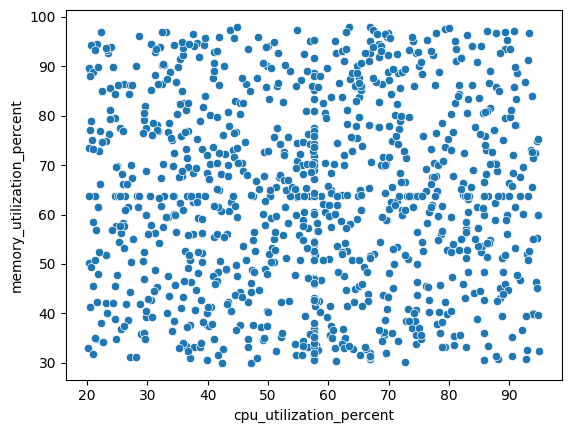

In [73]:
sns.scatterplot(x=df['cpu_utilization_percent'],
                y=df['memory_utilization_percent'])

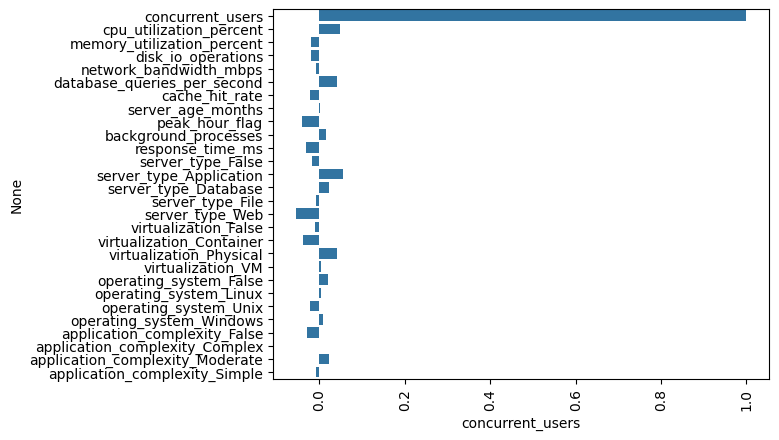

In [74]:
sns.barplot(x=df.corr(numeric_only=True)['concurrent_users'],
            y=df.corr(numeric_only=True)['concurrent_users'].index)
plt.xticks(rotation=90)
plt.show()

correlation heatmap showing how strongly numerical features are related to each other.

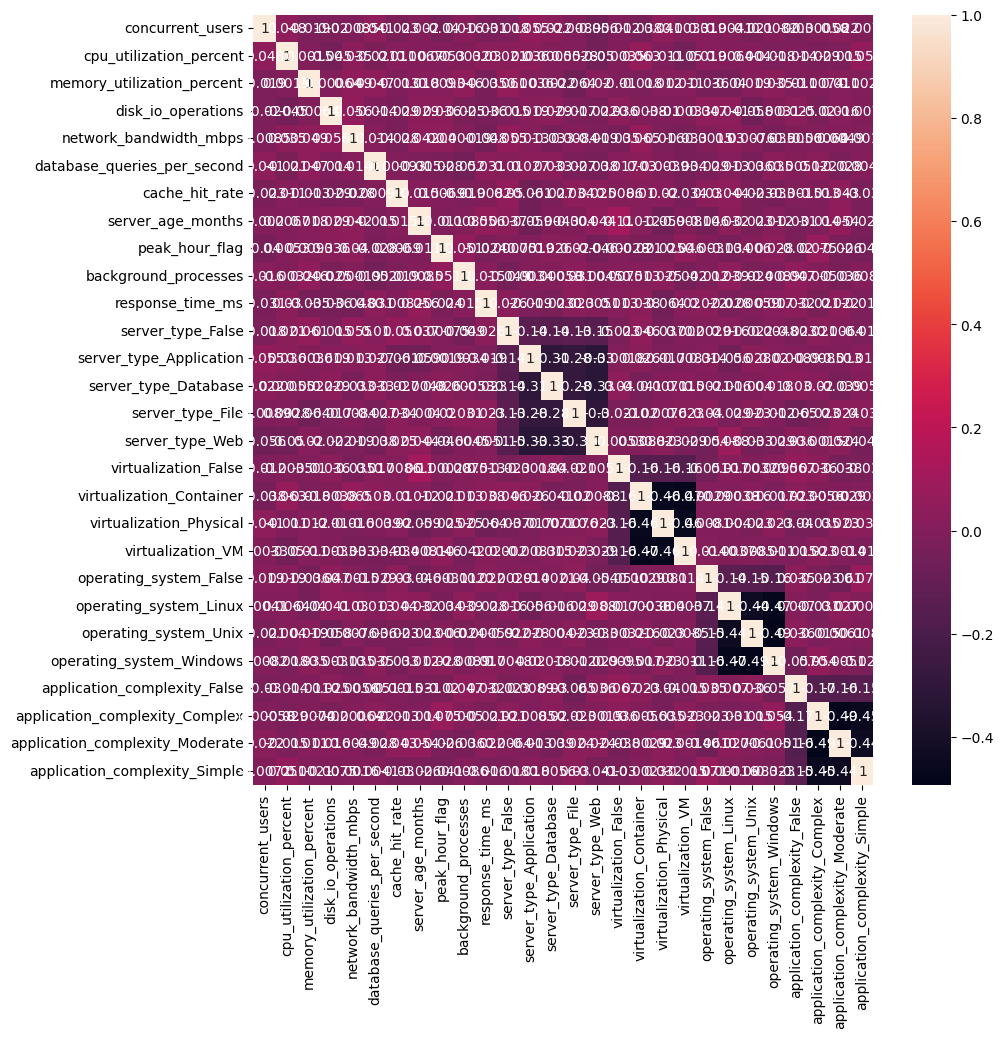

In [75]:
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

It creates a histogram that shows the distribution of values in the concurrent_users column.

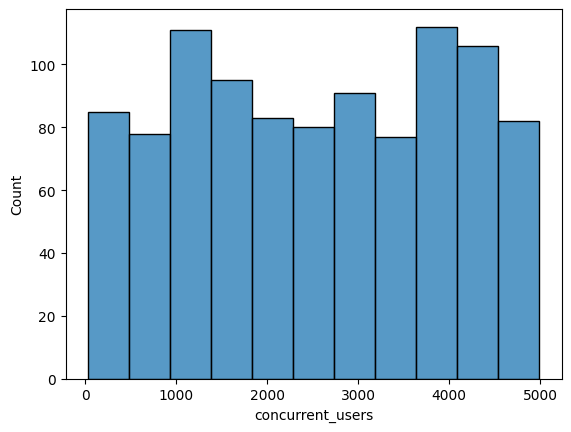

In [76]:
sns.histplot(df['concurrent_users'])
plt.show()